In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [3]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [4]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

In [5]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [6]:
epochs_cache = []
losses_cache = []

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
#     print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    
    epochs_cache.append(epoch)
    losses_cache.append(loss)

for epoch, loss in zip(epochs_cache[-10:], losses_cache[-10:]):
    print('epoch {}, loss {}'.format(epoch, loss))

epoch 90, loss 0.2661592662334442
epoch 91, loss 0.26318711042404175
epoch 92, loss 0.2602479159832001
epoch 93, loss 0.25734198093414307
epoch 94, loss 0.25446805357933044
epoch 95, loss 0.2516268491744995
epoch 96, loss 0.24881674349308014
epoch 97, loss 0.24603794515132904
epoch 98, loss 0.24329061806201935
epoch 99, loss 0.2405739426612854


[[ 0.08760158]
 [ 2.2189953 ]
 [ 4.350389  ]
 [ 6.481783  ]
 [ 8.613176  ]
 [10.74457   ]
 [12.875964  ]
 [15.007358  ]
 [17.13875   ]
 [19.270144  ]
 [21.401537  ]]


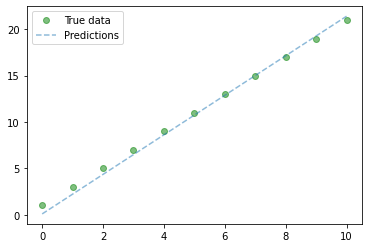

In [7]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

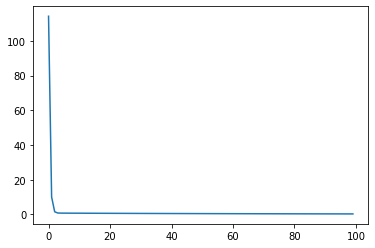

In [8]:
plt.plot(epochs_cache, losses_cache)
plt.show()
plt.close()

In [10]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [13]:
torch.nn.Linear?

In [12]:
model2 = linearRegression(100, 2)
model2.size

AttributeError: 'linearRegression' object has no attribute 'size'